<a href="https://colab.research.google.com/github/trantoan62/AI-ANN-TranQuocToan/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


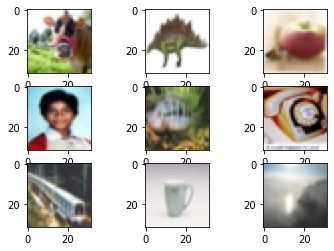

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [ ]:
model = Sequential()
model.add(Dense(512,activation= 'relu' ,input_shape=(3072,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,887,332
Trainable params: 1,887,332
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'RMSprop', 
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 200, verbose =1, validation_data = (x_test, y_test))

Epoch 1/200
391/391 [==============================] - 5s 6ms/step - loss: 4.2159 - accuracy: 0.0676 - val_loss: 4.0825 - val_accuracy: 0.0799
Epoch 2/200
391/391 [==============================] - 2s 4ms/step - loss: 3.7439 - accuracy: 0.1300 - val_loss: 3.7979 - val_accuracy: 0.1307
Epoch 3/200
391/391 [==============================] - 2s 5ms/step - loss: 3.5673 - accuracy: 0.1615 - val_loss: 3.5754 - val_accuracy: 0.1633
Epoch 4/200
391/391 [==============================] - 2s 6ms/step - loss: 3.4424 - accuracy: 0.1826 - val_loss: 3.5545 - val_accuracy: 0.1752
Epoch 5/200
391/391 [==============================] - 2s 5ms/step - loss: 3.3508 - accuracy: 0.2006 - val_loss: 3.4528 - val_accuracy: 0.1908
Epoch 6/200
391/391 [==============================] - 2s 5ms/step - loss: 3.2695 - accuracy: 0.2170 - val_loss: 3.4205 - val_accuracy: 0.2077
Epoch 7/200
391/391 [==============================] - 2s 4ms/step - loss: 3.2030 - accuracy: 0.2263 - val_loss: 3.4224 - val_accuracy: 0.1996

In [ ]:
Score = model.evaluate(x_test,y_test,verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 4.1918 - accuracy: 0.1335


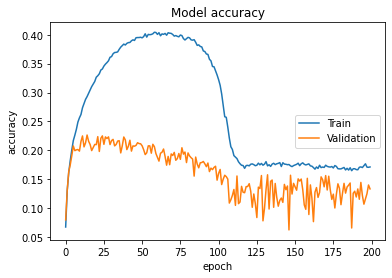

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc ='center right')
plt.show()

In [ ]:
model.save('cifar100.h5')